KMeans Class step by step

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
from abc import ABC, abstractmethod

In [3]:
# abstract class

class KMeansInterface(ABC):
        
     @abstractmethod 
     def fit(self, data):
        pass
     @abstractmethod
     def predict(self, data):
        pass

In [4]:
class KMeans(KMeansInterface):
    
    def __init__(self,n_clusters):
        self.n_clusters=n_clusters
        
        
    def choose_clusters(self,data):
        size =len(data) #  data.shape[0]
    
        indices = np.random.choice(size, self.n_clusters, replace=False)
    
        return data[indices]
    
    def calculate_sum_squared_distance(self,data):
        clusters=self.choose_clusters(data)
        distances = np.zeros((data.shape[0], self.n_clusters))
        for i, centroid in enumerate(clusters):
            distance = np.sum(np.square(data - centroid), axis=1)
            distances[:, i] = distance
        return distances 
    
    def calculate_closest_clusters(self,data):
        distances=self.calculate_sum_squared_distance(data)
        closest_clusters = np.argmin(distances, axis=1)
        return closest_clusters
    
    def update_clusters(self,data):
        labels=self.calculate_closest_clusters(data)
        new_clusters = []
        for i in range(self.n_clusters):
           points_in_clusters = data[labels==i]
           values = np.mean(points_in_clusters, axis=0)
           new_clusters.append(values)
        return np.array(new_clusters)
    
    
    def fit(self,data,max_iter=20000):
        clusters = self.choose_clusters(data)
        prev_labels = None
        for i in range(max_iter):
            distances = self.calculate_sum_squared_distance(data)
            labels = self.calculate_closest_clusters(data)
            clusters =self.update_clusters(data)
            if prev_labels is not None:
                if np.all(prev_labels == labels):
                    break
            prev_labels = labels
        return labels
    
    
    def predict(self,data):
        clusters=self.choose_clusters(data)
        distances = self.calculate_sum_squared_distance(data)
        labels = self.calculate_closest_clusters(data)
        return labels

In [5]:
kmeans=KMeans(2)
X = np.array([[2,3], 
             [3,4],
             [7,5],
             [3,2],
             [5,5],
             [5,3],
             [6,3]])


In [6]:
kmeans.fit(X)

array([0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [7]:
kmeans.predict(X)

array([1, 1, 0, 1, 0, 0, 0], dtype=int64)

IMPLEMENTATION

In [8]:
from sklearn import cluster, datasets

def generate_donut(data_points):
    donut = datasets.make_circles(n_samples=data_points, factor=.5,
                                          noise=.05)
    return donut[0]

def generate_moons(data_points):
    noisy_moons = datasets.make_moons(n_samples=data_points, noise=.05)
    return noisy_moons[0]

def generate_blobs(data_points):
    blobs = datasets.make_blobs(n_samples=data_points, random_state=8)
    return blobs[0]

def generate_square(data_points):
    square = np.random.rand(data_points, 2), None
    return square[0]

def generate_elipsoid_blobs(data_points):
    random_state = 170
    X, y = datasets.make_blobs(n_samples=data_points, random_state=random_state)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X_aniso = np.dot(X, transformation)
    aniso = (X_aniso, y)[0]
    return aniso

def generate_nn_blobs(data_points):
    random_state=170
    varied = datasets.make_blobs(n_samples=1000,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
    varied = varied[0]
    return varied

In [9]:
clustering = KMeans(2)
X_donut = generate_donut(1000)
labels_donut= clustering.fit(X_donut)

In [11]:
X_donut.shape

(1000, 2)

In [12]:
X_donut.shape[0]

1000

In [13]:
clustering = KMeans(2)
X_moons = generate_moons(1500)
labels_moons = clustering.fit(X_moons)

In [14]:
clustering = KMeans(3)
X_blobs = generate_blobs(1000)
labels_blobs = clustering.fit(X_blobs)

In [15]:
clustering = KMeans(3)
X_square = generate_square(1000)
labels_square = clustering.fit(X_square)

In [16]:
clustering = KMeans(3)
X_elipse = generate_elipsoid_blobs(1000)
labels_elipse = clustering.fit(X_elipse)

In [17]:
clustering = KMeans(n_clusters=3)
X_nn_blobs = generate_nn_blobs(1000)
labels_nn_blobs = clustering.fit(X_nn_blobs)

PLOT

<IPython.core.display.Javascript object>


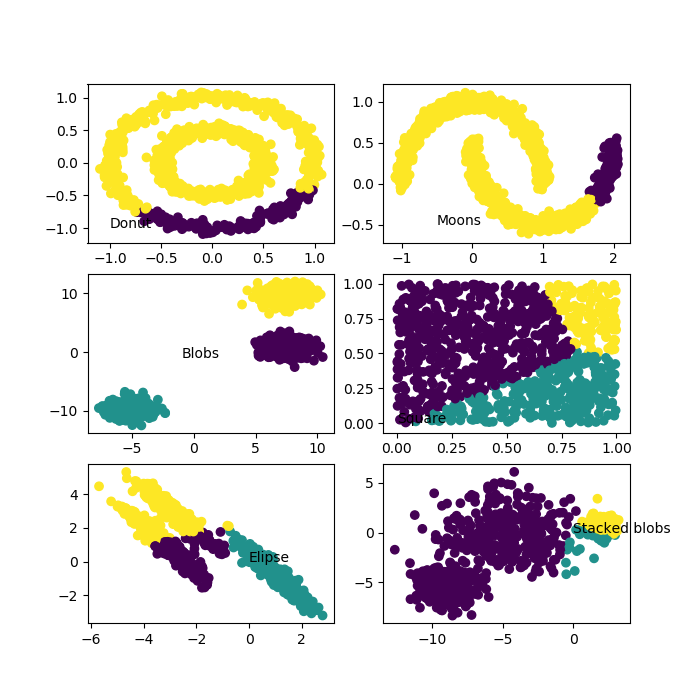

In [20]:
fig = plt.figure(figsize=(7,7))


ax = fig.add_subplot(3,2,1)
ax.text(-1,-1,"Donut")
ax.scatter(X_donut[:,0], X_donut[:,1], c=labels_donut) 
ax = fig.add_subplot(3,2,2)
ax.text(-0.5,-0.5,"Moons")
ax.scatter(X_moons[:,0], X_moons[:,1], c=labels_moons)
ax = fig.add_subplot(3,2,3)
ax.text(-1,-1,"Blobs")
ax.scatter(X_blobs[:,0], X_blobs[:,1], c=labels_blobs)
ax = fig.add_subplot(3,2,4)
ax.text(0.0, 0.0,"Square")
ax.scatter(X_square[:,0], X_square[:,1], c=labels_square)
ax = fig.add_subplot(3,2,5)
ax.text(0.0, 0.0,"Elipse")
ax.scatter(X_elipse[:,0], X_elipse[:,1], c=labels_elipse)
ax = fig.add_subplot(3,2,6)
ax.text(0.0, 0.0,"Stacked blobs")
ax.scatter(X_nn_blobs[:,0], X_nn_blobs[:,1], c=labels_nn_blobs)
plt.show()